In [1]:
#from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import pylab as pl
import os
import json
import getcsv 
from pandas.tools.plotting import scatter_matrix
import matplotlib
matplotlib.style.use('bmh')
import geopandas
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

In [ ]:
#https://data.cityofnewyork.us/resource/m46j-75iy.csv
# #'https://data.cityofnewyork.us/api/views/INLINE/rows.csv?accessType=DOWNLOAD'
# fname = 'Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv'
# url_nrg = (os.getenv('PUIDATA') + '/' + fname)
# print url_nrg
# nrg_all = pd.read_csv(url_nrg)
# # pluto_url = 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mappluto_16v1.zip'
# # fname = 'Manhattan/MNMapPLUTO.shp'
# # url_bsize = (os.getenv('PUIDATA') + '/' + fname)
# # print url_bsize
# # bsize = gp.GeoDataFrame.from_file(url_bsize)

I am using geopanda. that is **not required** for this particular exercise, but geopand works with geospacial data: the shape files that we get from pluto for example.

PLEASE REMEMBER: seed your random functions if you need to use any, label your axes clearly, comment your code, use PEP8!


## An interesting urban question is "can we measure and predict energy use based on observables that are easier to be acquired". For example the urban observatory at CUSP can monitor lights: they are a realtively easy observable. All you need is a camera, and a pipeline to process your data. But how does the light coming from a window relate to the total energy consumption? We generally postulate that light is a proxy for occupancy, and that occupancy is a good predictor of energy consumption.
## So let's test if the last link holds. If we have data on the energy consumed by a __building__ how well does that relate to the number of units in the building?

## Data on energy consumption can be found here for the city of NY https://data.cityofnewyork.us/Environment/Energy-and-Water-Data-Disclosure-for-Local-Law-84-/rgfe-8y2z  

## Either obtain the data through the API or download the csv file, and move it to $PUIDATA

## However this datasets does not have the number of units. We can find that in the Pluto dataset.

## Reading in the Pluto data for manhattan, which will give me the number of units ber building   Manhattan/MNMapPLUTO.shp

In [3]:
getcsv.getEnergycsv()
getcsv.getPLUTOcsv()
getcsv.getPLUTOcsv()

Downloading
file in place, you can continue
Downloading
file in place, you can continue
Downloading
file in place, you can continue


In [4]:
nrg = pd.read_csv(os.getenv('PUIDATA') + '/' + 'm46j-75iy.csv')
bsize = gp.GeoDataFrame.from_file(os.getenv('PUIDATA') + '/' + 'Manhattan/MNMapPLUTO.shp')

In [5]:
nrg.columns

Index([u'automatic_water_benchmarking_eligible', u'bbls_co_reported',
       u'borough', u'co_reported_bbl_status', u'direct_ghg_emissions_mtco2e',
       u'dof_benchmarking_submission_status', u'dof_number_of_buildings',
       u'dof_property_floor_area_buildngs_and_parking_ft2',
       u'energy_star_score', u'indirect_ghg_emissions_mtco2e',
       u'municipally_supplied_potable_water_indoor_intensity_gal_ft',
       u'nyc_borough_block_and_lot_bbl',
       u'primary_property_type_self_selected', u'record_number',
       u'reported_nyc_building_identificaiton_numbers_bins',
       u'reported_property_floor_area_building_s_ft', u'reported_water_method',
       u'site_eui_kbtu_ft2', u'source_eui_kbtu_ft2', u'street_name',
       u'street_number', u'total_ghg_emissions_mtco2e',
       u'weather_normalized_site_eui_kbtu_ft2',
       u'weather_normalized_source_eui_kbtu_ft2', u'zip_code'],
      dtype='object')

In [6]:
bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

In [7]:
nrg.drop(['automatic_water_benchmarking_eligible', 'bbls_co_reported',
          'co_reported_bbl_status', 'direct_ghg_emissions_mtco2e',
       'dof_benchmarking_submission_status','dof_property_floor_area_buildngs_and_parking_ft2',
       'energy_star_score', 'indirect_ghg_emissions_mtco2e',
       'municipally_supplied_potable_water_indoor_intensity_gal_ft',
       'primary_property_type_self_selected', 'record_number',
       'reported_nyc_building_identificaiton_numbers_bins', 'reported_water_method',
       'street_name', 'street_number'], axis = 1, inplace = True)

In [8]:
bsize.drop(['APPBBL', 'APPDate', 'Address', 'AllZoning1',
       'AllZoning2', 'AreaSource', 'AssessLand',  'AssessTot',
        'BldgArea', 'BldgClass', 'BldgDepth',
        'BldgFront', 'Block',  'BoroCode',  'Borough',
         'BsmtCode',  'BuiltCode',   'BuiltFAR',     'CB2010',
               'CD',     'CT2010',    'ComArea',    'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       'ExemptLand',  'ExemptTot',        'Ext',   'FacilFAR',
       'FactryArea',   'FireComp', 'GarageArea', 'HealthArea',
         'HistDist', 'IrrLotCode',    'LandUse',   'Landmark',
              'Lot',    'LotArea',   'LotDepth',   'LotFront',
          'LotType',  'LtdHeight', 'MAPPLUTO_F', 'NumFloors',
            'OfficeArea',  'OtherArea',   'Overlay1',
         'Overlay2',  'OwnerName',  'OwnerType', 'PLUTOMapID',
        'PolicePrct',   'ProxCode',    'ResArea',   'ResidFAR',
       'RetailArea', 'SHAPE_Area', 'SHAPE_Leng',    'SPDist1',
          'SPDist2','Sanborn',  'SanitBoro',  'SanitDist',
         'SanitSub', 'SchoolDist',  'SplitZone',  'StrgeArea',
           'TaxMap',  'Tract2010','Version', 'XCoord', 'YCoord', 'YearAlter1',
       'YearAlter2',  'YearBuilt',     'ZMCode','ZoneDist1',  'ZoneDist2',  'ZoneDist3',  'ZoneDist4',
          'ZoneMap',   'geometry'], axis = 1, inplace=True)

In [9]:
print nrg.shape
print bsize.shape

(16170, 10)
(42697, 5)


In [10]:
nrg.columns

Index([u'borough', u'dof_number_of_buildings',
       u'nyc_borough_block_and_lot_bbl',
       u'reported_property_floor_area_building_s_ft', u'site_eui_kbtu_ft2',
       u'source_eui_kbtu_ft2', u'total_ghg_emissions_mtco2e',
       u'weather_normalized_site_eui_kbtu_ft2',
       u'weather_normalized_source_eui_kbtu_ft2', u'zip_code'],
      dtype='object')

In [11]:
bsize.head(5)

,BBL,NumBldgs,UnitsRes,UnitsTotal,ZipCode
0,1.015450e+09,1,16,18,10028
1,1.007238e+09,1,50,50,10001
2,1.016800e+09,1,10,10,10029
3,1.013850e+09,1,29,32,10021
4,1.011970e+09,1,26,26,10024


In [12]:
nrg['site_eui_kbtu_ft2'] = pd.to_numeric(nrg['site_eui_kbtu_ft2'], errors='coerce')
nrg['reported_property_floor_area_building_s_ft'] = pd.to_numeric(nrg['reported_property_floor_area_building_s_ft'], 
                                                                        errors='coerce')
#nrg.dropna(inplace=True)

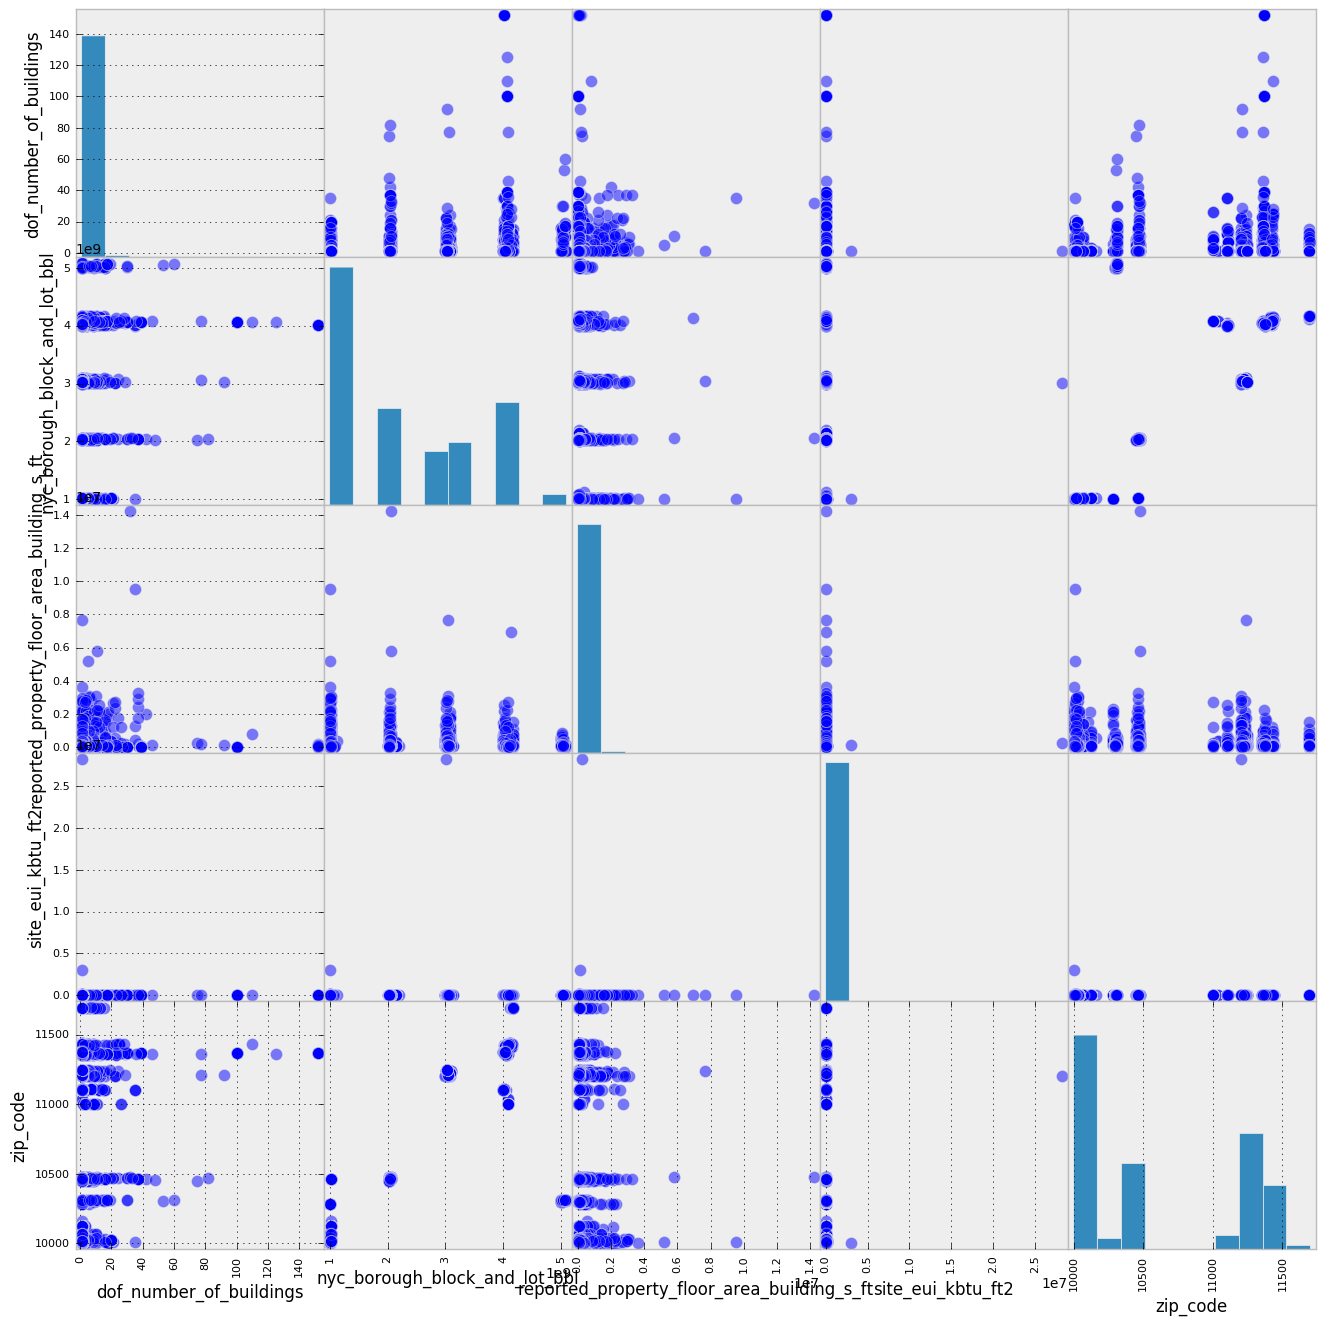

In [14]:
#try make a scatter plot of nrg. Few columns will plot
#nrg.rename(columns={"Reported Property Floor Area (Building(s)) (ft²)": "Rep_Prop_Flr_Area",
#                   "NYC Borough, Block, and Lot (BBL)": "BBL"}, inplace=True)
scatter_matrix (nrg, s=300, figsize=(16, 16))
pl.show()

# Figure 1: scatter matrix of all numerical values in the files.

# MERGE THE DATASET
TO DO IT WE NEED A COMMON COLUMN: the building id BBL However the name of this variable (column) in the Energy dataset is 'NYC Borough, Block, and Lot (BBL)'. create a column 'BBL' in the nrg dataset to pass it to the 'on' keyword argument of the merge pandas method: pd.merge(..... on=['BBL']) will use the common column 'BBL' to join the information from the 2 datasets for each BBL value (check out the complete syntax!)

In [15]:
# prepare your BBL columns
nrg.rename(columns={'nyc_borough_block_and_lot_bbl':'BBL'}, inplace=True)
#merge
bblnrgdata = pd.merge(nrg, bsize, on='BBL')

In [16]:
(nrg.dropna()).shape

(10454, 10)

In [17]:
(bsize.dropna()).shape

(42697, 5)

In [18]:
print nrg.shape
print bsize.shape
print bblnrgdata.shape

(16170, 10)
(42697, 5)
(6492, 14)


In [19]:
bblnrgdata.head(5)

,borough,dof_number_of_buildings,BBL,reported_property_floor_area_building_s_ft,site_eui_kbtu_ft2,source_eui_kbtu_ft2,total_ghg_emissions_mtco2e,weather_normalized_site_eui_kbtu_ft2,weather_normalized_source_eui_kbtu_ft2,zip_code,NumBldgs,UnitsRes,UnitsTotal,ZipCode
0,Manhattan,1.0,1.006700e+09,NaN,NaN,NaN,NaN,NaN,NaN,10001.0,1,0,1,10001
1,Manhattan,1.0,1.004370e+09,NaN,NaN,NaN,NaN,NaN,NaN,10009.0,1,0,4,10009
2,Manhattan,1.0,1.013110e+09,330000.0,125.4,239.8,3556.4,123.8,237.9,10022.0,1,0,56,10022
3,Manhattan,1.0,1.009220e+09,NaN,NaN,NaN,NaN,NaN,NaN,10003.0,1,148,148,10003
4,Manhattan,NaN,1.007400e+09,68329.0,NaN,NaN,NaN,Not Available,Not Available,NaN,1,0,1,10011


In [20]:
bblnrgdata.columns

Index([                                   u'borough',
                          u'dof_number_of_buildings',
                                              u'BBL',
       u'reported_property_floor_area_building_s_ft',
                                u'site_eui_kbtu_ft2',
                              u'source_eui_kbtu_ft2',
                       u'total_ghg_emissions_mtco2e',
             u'weather_normalized_site_eui_kbtu_ft2',
           u'weather_normalized_source_eui_kbtu_ft2',
                                         u'zip_code',
                                         u'NumBldgs',
                                         u'UnitsRes',
                                       u'UnitsTotal',
                                          u'ZipCode'],
      dtype='object')

In [21]:
bblnrgdata.dropna(inplace=True)

In [22]:
bblnrgdata.head(5)

,borough,dof_number_of_buildings,BBL,reported_property_floor_area_building_s_ft,site_eui_kbtu_ft2,source_eui_kbtu_ft2,total_ghg_emissions_mtco2e,weather_normalized_site_eui_kbtu_ft2,weather_normalized_source_eui_kbtu_ft2,zip_code,NumBldgs,UnitsRes,UnitsTotal,ZipCode
2,Manhattan,1.0,1.013110e+09,330000.0,125.4,239.8,3556.4,123.8,237.9,10022.0,1,0,56,10022
15,Manhattan,1.0,1.007660e+09,59468.0,122.3,347,584.4,122.4,347.3,10011.0,1,0,8,10011
16,Manhattan,1.0,1.008150e+09,364000.0,117.0,257,3613,115.9,255.7,10018.0,1,0,24,10018
18,Manhattan,1.0,1.005050e+09,235370.0,82.1,201.3,1392.3,81.9,201.2,10013.0,1,0,24,10013
19,Manhattan,1.0,1.021420e+09,64806.0,137.7,192.5,673.6,137.5,192.1,10032.0,1,54,62,10032


once you have the dataframe with all the info you want, you want to plot Energy vs Number of Units in the Building. Remember: **Energy TOTAL, not per sq ft...** Here you can choose what you think makes more sense for the number of units: all units, residential units... 

**Make a  scatter plot first of Energy vs Units. It will look really bad be cause all the datapoints are at very low Unit numbers while the Unit number range actually goes up to 8000. **


Make a second plot that zooms into the region where most points are by cutting your x and y axis plotted: e,g, use xlim=(1000,1e10), ylim=(1,1000), where the numbers to be plugged in depend on exactly what you chose to plot

I left my plots below as guidance. **Remember, each plot needs a descriptive caption, and axis labels**

In [23]:
bblnrgdata['total_energy'] = bblnrgdata.site_eui_kbtu_ft2 * bblnrgdata.reported_property_floor_area_building_s_ft
bblnrgdata.head(5)

,borough,dof_number_of_buildings,BBL,reported_property_floor_area_building_s_ft,site_eui_kbtu_ft2,source_eui_kbtu_ft2,total_ghg_emissions_mtco2e,weather_normalized_site_eui_kbtu_ft2,weather_normalized_source_eui_kbtu_ft2,zip_code,NumBldgs,UnitsRes,UnitsTotal,ZipCode,total_energy
2,Manhattan,1.0,1.013110e+09,330000.0,125.4,239.8,3556.4,123.8,237.9,10022.0,1,0,56,10022,41382000.0
15,Manhattan,1.0,1.007660e+09,59468.0,122.3,347,584.4,122.4,347.3,10011.0,1,0,8,10011,7272936.4
16,Manhattan,1.0,1.008150e+09,364000.0,117.0,257,3613,115.9,255.7,10018.0,1,0,24,10018,42588000.0
18,Manhattan,1.0,1.005050e+09,235370.0,82.1,201.3,1392.3,81.9,201.2,10013.0,1,0,24,10013,19323877.0
19,Manhattan,1.0,1.021420e+09,64806.0,137.7,192.5,673.6,137.5,192.1,10032.0,1,54,62,10032,8923786.2


In [24]:
bblnrgdata.dtypes

borough                                        object
dof_number_of_buildings                       float64
BBL                                           float64
reported_property_floor_area_building_s_ft    float64
site_eui_kbtu_ft2                             float64
source_eui_kbtu_ft2                            object
total_ghg_emissions_mtco2e                     object
weather_normalized_site_eui_kbtu_ft2           object
weather_normalized_source_eui_kbtu_ft2         object
zip_code                                      float64
NumBldgs                                        int64
UnitsRes                                        int64
UnitsTotal                                      int64
ZipCode                                         int64
total_energy                                  float64
dtype: object

In [25]:
bblnrgdata['UnitsTotal'].describe()

count    4683.000000
mean      111.322870
std       210.091349
min         0.000000
25%        27.000000
50%        65.000000
75%       125.500000
max      8805.000000
Name: UnitsTotal, dtype: float64

In [26]:
bblnrgdata['total_energy'].describe()

count    4.683000e+03
mean     2.255409e+08
std      5.454711e+09
min      0.000000e+00
25%      5.985396e+06
50%      9.482455e+06
75%      1.875796e+07
max      3.501452e+11
Name: total_energy, dtype: float64

In [189]:
# Cleaning Data
#Total no. of Units = 0 is an incorrect value and an outlier becasue a building must have >=1 units
#Energy Consumption = 0 is possible only if the building is non-operating, and such buildings are not relevant to our model
#so thet are considered as outliers
#Removing points having number of units as 0 and 0 total energy
bblnrgdata_refined = bblnrgdata[bblnrgdata['total_energy'] > 0 ]
bblnrgdata_refined = bblnrgdata_refined[bblnrgdata_refined['UnitsTotal'] > 0]

# Removing building units that are too high(more than 1000), because they are high leverage points but they maybe important.
# However, I am throwing them away functionally for my analysis to work
bblnrgdata_refined = bblnrgdata_refined[bblnrgdata_refined['UnitsTotal'] <= 1000]

In [97]:
print bblnrgdata.shape
print bblnrgdata_refined.shape

(4683, 15)
(4603, 15)


In [98]:
bblnrgdata_refined['total_energy'].describe()

count    4.603000e+03
mean     2.270034e+08
std      5.500880e+09
min      5.344000e+03
25%      5.989163e+06
50%      9.425725e+06
75%      1.834047e+07
max      3.501452e+11
Name: total_energy, dtype: float64

In [99]:
bblnrgdata_refined['UnitsTotal'].describe()

count    4603.000000
mean      102.692592
std       123.845099
min         1.000000
25%        28.000000
50%        65.000000
75%       125.000000
max       997.000000
Name: UnitsTotal, dtype: float64

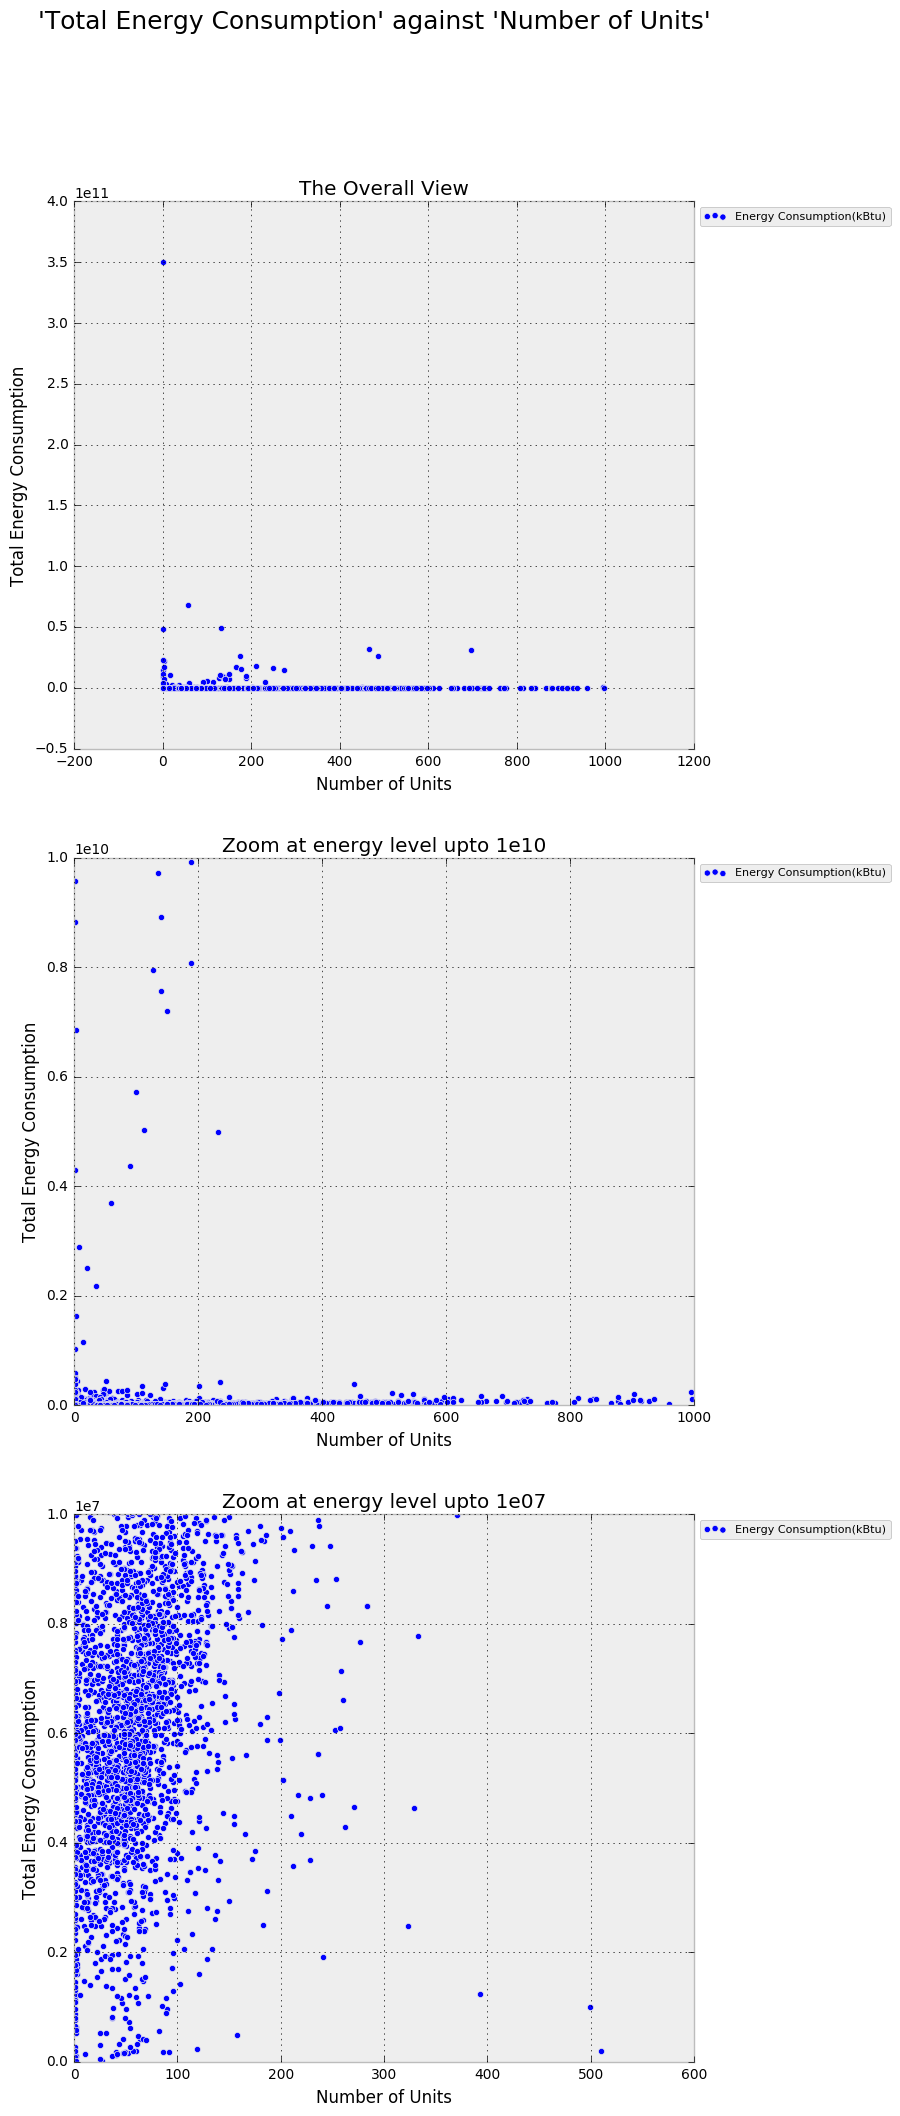

In [190]:
fig = pl.figure(figsize=(8,24))
pl.suptitle("'Total Energy Consumption' against 'Number of Units'", fontsize = 18)

ax1 = fig.add_subplot(311)
# bblnrgdata_refined.plot(kind="scatter",     
#               x="total_energy",          
#               y="UnitsTotal",
#               figsize=(10,10))
ax1.scatter(bblnrgdata_refined["UnitsTotal"], bblnrgdata_refined["total_energy"],
            label = 'Energy Consumption(kBtu)')
pl.legend(fontsize = 8, loc="upper left", bbox_to_anchor=(1,1))
pl.title('The Overall View')
pl.ylabel('Total Energy Consumption')
pl.xlabel('Number of Units')

ax2 = fig.add_subplot(312)
ax2.scatter(bblnrgdata_refined["UnitsTotal"], bblnrgdata_refined["total_energy"],
            label = 'Energy Consumption(kBtu)')
pl.title('Zoom at energy level upto 1e10')
pl.ylim(0,1e10)
pl.xlim(0,1000)
pl.legend(fontsize = 8, loc="upper left", bbox_to_anchor=(1,1))
pl.ylabel('Total Energy Consumption')
pl.xlabel('Number of Units')

ax3 = fig.add_subplot(313)
ax3.scatter(bblnrgdata_refined["UnitsTotal"], bblnrgdata_refined["total_energy"],
            label = 'Energy Consumption(kBtu)')
pl.title('Zoom at energy level upto 1e07')
pl.ylim(0,1e07)
pl.xlim(0,600)
pl.legend(fontsize = 8, loc="upper left", bbox_to_anchor=(1,1))
pl.ylabel('Total Energy Consumption')
pl.xlabel('Number of Units')

# Figure 2  : The Scatter plots above show the Total energy consumed in kBtu against total number of units. Most of the points are concentrated at units less than 200 as seen from the last plot 

when the points in a plot all look scrunched against the axis 

**Try to make a log plot instead**. In pandas you enable that with the keyword 'loglog' : bblnrgdata.plot(..... loglog=True)

NOTICE THAT YOU WILL STILL HAVE TO CUT YOUR DATASET! in my data I had a lot of energy datapoints that were exactly 0. I removed these "outliers" which I think are truly outliers in the sense that they are misreported numbers. you can remove the data that have nrg==0 (or nrg < some sensible threshold choice) by indexing your array: something like bblnrgdata_cut = bblnrgdata[bblnrgdata.nrg>1000]

Also I removed the buildings with several thousand units. points like that at the edge of my range would have a lot of "LEVERAGE", however they are not suprious entries like the 0, which i believe are missing values, or perhaps abandoned lots. these are good datapoint that i need to throw away functionally for my analysis to work, but that should be stated clearly.



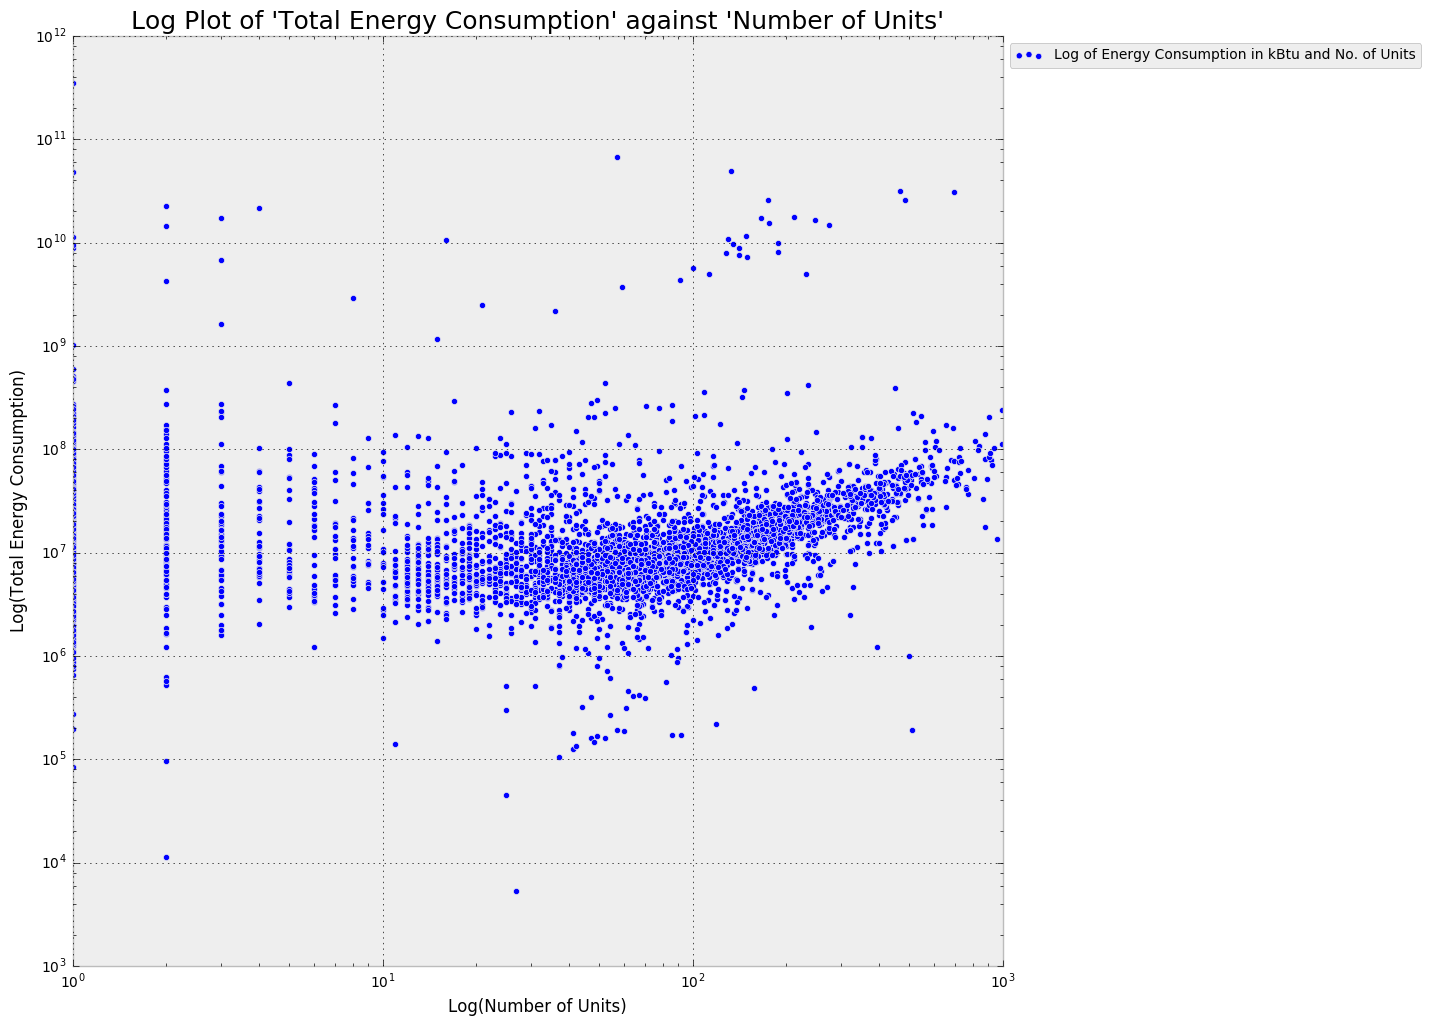

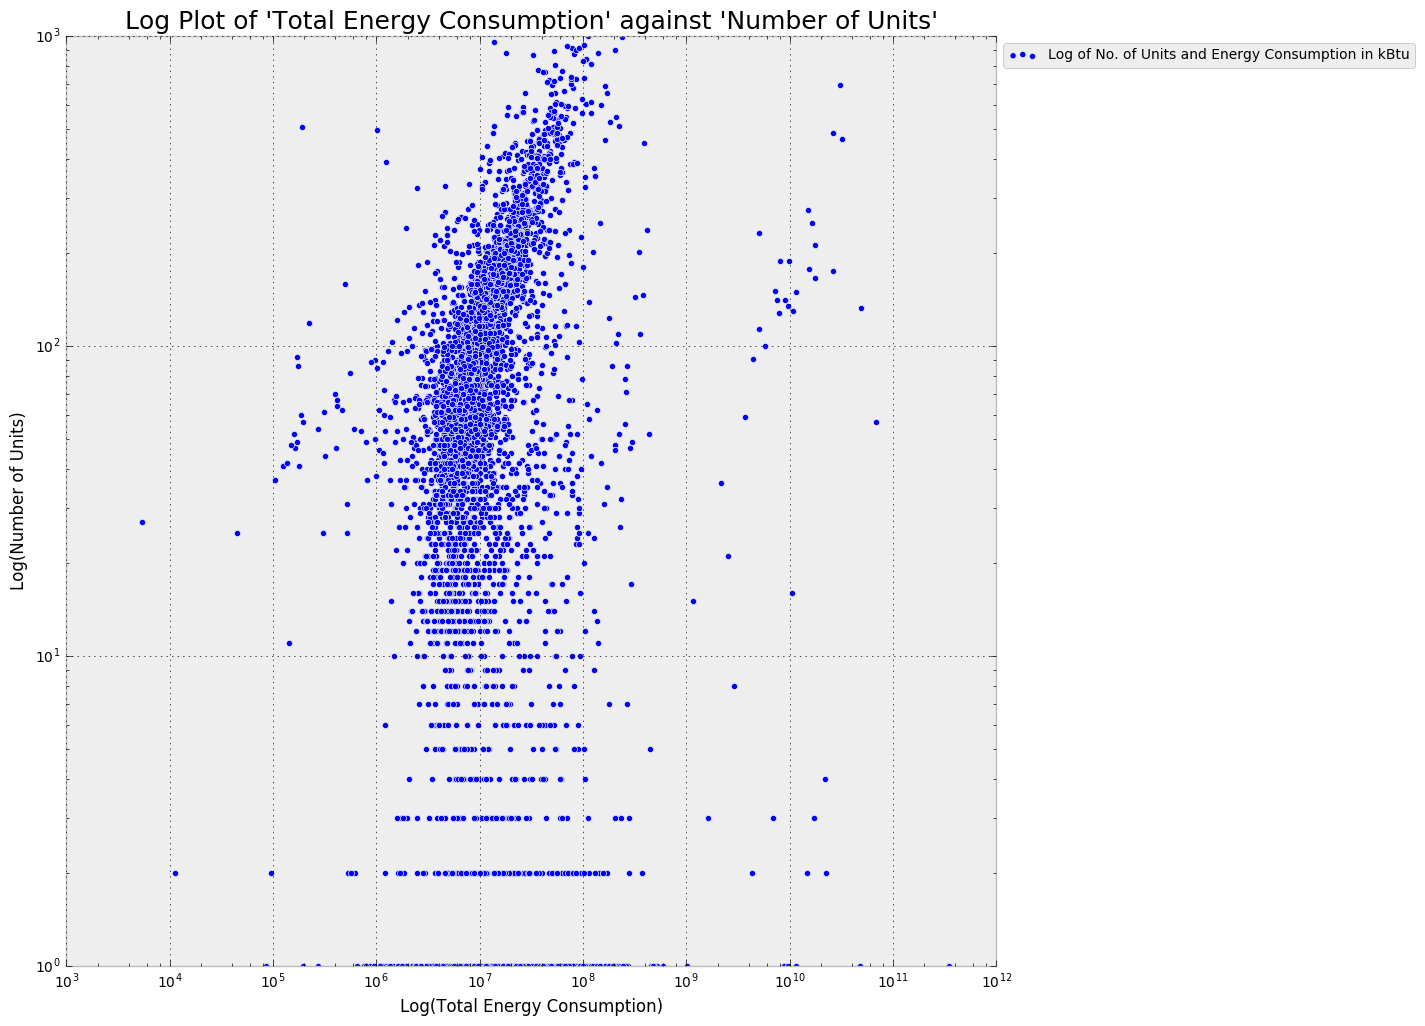

In [101]:
# Log Plot

bblnrgdata_refined.plot(kind="scatter",     
                        x="UnitsTotal",          
                        y="total_energy",
                        figsize=(12, 12),
                        loglog = True,
                        label = 'Log of Energy Consumption in kBtu and No. of Units')

pl.xlim(10**0, 10**3)
pl.legend(fontsize = 10, loc="upper left", bbox_to_anchor=(1,1))
pl.title("Log Plot of 'Total Energy Consumption' against 'Number of Units'", fontsize = 18)
pl.ylabel('Log(Total Energy Consumption)')
pl.xlabel('Log(Number of Units)')

bblnrgdata_refined.plot(kind="scatter",     
                        x="total_energy",          
                        y="UnitsTotal",
                        figsize=(12, 12),
                        loglog = True,
                        label = 'Log of No. of Units and Energy Consumption in kBtu')

pl.ylim(10**0, 10**3)
pl.legend(fontsize = 10, loc="upper left", bbox_to_anchor=(1,1))
pl.title("Log Plot of 'Total Energy Consumption' against 'Number of Units'", fontsize = 18)
pl.xlabel('Log(Total Energy Consumption)')
pl.ylabel('Log(Number of Units)')

# Figure 3: The log plots of energy consumed and number of units, some linear relation is seen

Now fit a line through the data. you can use whatever you want to do it: statsmodels, scipy, any other package, or write your own minimization of the residuals

# The question which we are trying to answer and with the distribution of the data available, it makes sense that 'Energy Consumed' will be the dependant variable on the independent variable 'Number of Units'

# Looking at the log plot, I am going to consider only the points(i.e points with log('No. of Units') greater than log(10)) where the spread is even and over a large range(as seen in figure 3), so that I get a proper line fit through the data 

In [ ]:
# # Create linear regression object
# regr = linear_model.LinearRegression()

# # Train the model 
# regr.fit(np.array(np.log10(bblnrgdata_refined['UnitsTotal'])).reshape(-1, 1),
#          np.array(np.log10(bblnrgdata_refined['total_energy'])))

# print 'Intercept:',regr.intercept_
# print 'Co-efficient:', regr.coef_
# print 'R_squared:', regr.score(X = np.array(np.log10(bblnrgdata_refined['UnitsTotal'])).reshape(-1, 1), 
#                                                y = np.log10(bblnrgdata_refined['total_energy']))

# prediction= regr.predict(X = np.array(np.log10(bblnrgdata_refined['UnitsTotal'])).reshape(-1, 1))


In [327]:
# Creating a dataframe with the log variables
data = pd.DataFrame({'Units_total':np.log10(bblnrgdata_refined['UnitsTotal']), 
                     'Total_energy': np.log10(bblnrgdata_refined['total_energy'])})
data = data[data['Units_total'] > np.log10(10)]
data.reset_index(inplace=True)
data.drop('index', axis = 1, inplace=True)

data['Units_total2'] = data.Units_total**2
data['Total_energy2'] = data.Total_energy**2

In [328]:
data.describe()

,Total_energy,Units_total,Units_total2,Total_energy2
count,3964.000000,3964.000000,3964.000000,3964.000000
mean,7.035671,1.897958,3.753866,49.726145
std,0.474911,0.389433,1.507658,7.127865
min,3.727866,1.041393,1.084499,13.896988
25%,6.777485,1.653213,2.733112,45.934298
50%,6.960620,1.880814,3.537460,48.450235
75%,7.234778,2.155336,4.645473,52.342006
max,10.831190,2.998695,8.992173,117.314687


In [318]:
x = data.Units_total
y = data.Total_energy
X = sm.add_constant(x)
linmodel = sm.OLS(y, X).fit()
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Total_energy   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     836.1
Date:                Sun, 16 Oct 2016   Prob (F-statistic):          5.62e-167
Time:                        23:24:21   Log-Likelihood:                -2293.0
No. Observations:                3964   AIC:                             4590.
Df Residuals:                    3962   BIC:                             4603.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           6.0695      0.034    177.938      0.000         6.003     6.136
Units_total     0.5091      0.018     28.916      0.000         0.475     0.544
==============================================================================
Omnibus:                     2201.097   Durbin-Watson:                   1.700
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49623.141
Skew:                           2.178   Prob(JB):                         0.00
Kurtosis:                      19.777   Cond. No.                         12.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

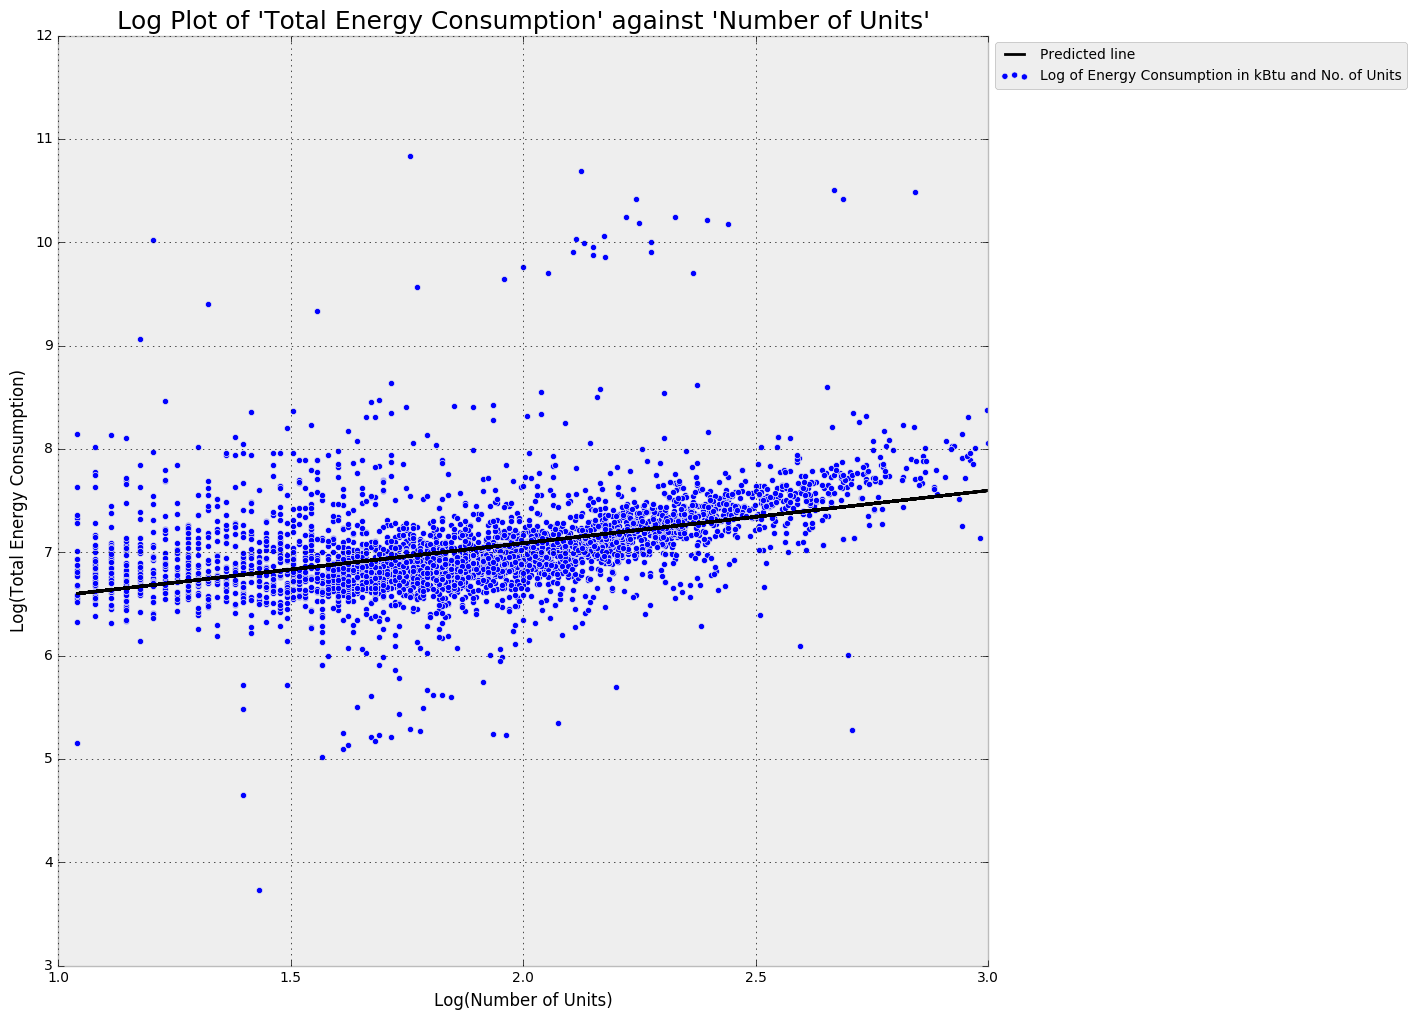

In [319]:
lin_pred = linmodel.predict(X)

data.plot(kind='scatter', 
          x='Units_total', 
          y='Total_energy',
          figsize=(12, 12),
          label = 'Log of Energy Consumption in kBtu and No. of Units')

pl.xlim(1,3)
pl.title("Log Plot of 'Total Energy Consumption' against 'Number of Units'", fontsize = 18)
pl.ylabel('Log(Total Energy Consumption)')
pl.xlabel('Log(Number of Units)')

pl.plot(data.Units_total, lin_pred, c = 'black', label='Predicted line')

pl.legend(fontsize = 10, loc="upper left", bbox_to_anchor=(1,1))

# Figure 4: The  plot shows that there is some linear relationship between the log of No. of variables and log of Energy consumption, the black line is the prediction line fitted using the OLS linear regression method, using log(No. of units) as independant variable and log(Energy Consumed) as dependant variable

In [320]:
yn = data.Units_total
xn = data.Total_energy
Xn = sm.add_constant(xn)
#X = np.log10(X)
linmodel_n = sm.OLS(yn, Xn).fit()
linmodel_n.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Units_total   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     836.1
Date:                Sun, 16 Oct 2016   Prob (F-statistic):          5.62e-167
Time:                        23:24:52   Log-Likelihood:                -1506.4
No. Observations:                3964   AIC:                             3017.
Df Residuals:                    3962   BIC:                             3029.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           -0.5104      0.083     -6.114      0.000        -0.674    -0.347
Total_energy     0.3423      0.012     28.916      0.000         0.319     0.366
==============================================================================
Omnibus:                      136.179   Durbin-Watson:                   1.340
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.265
Skew:                          -0.458   Prob(JB):                     2.35e-33
Kurtosis:                       3.266   Cond. No.                         107.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

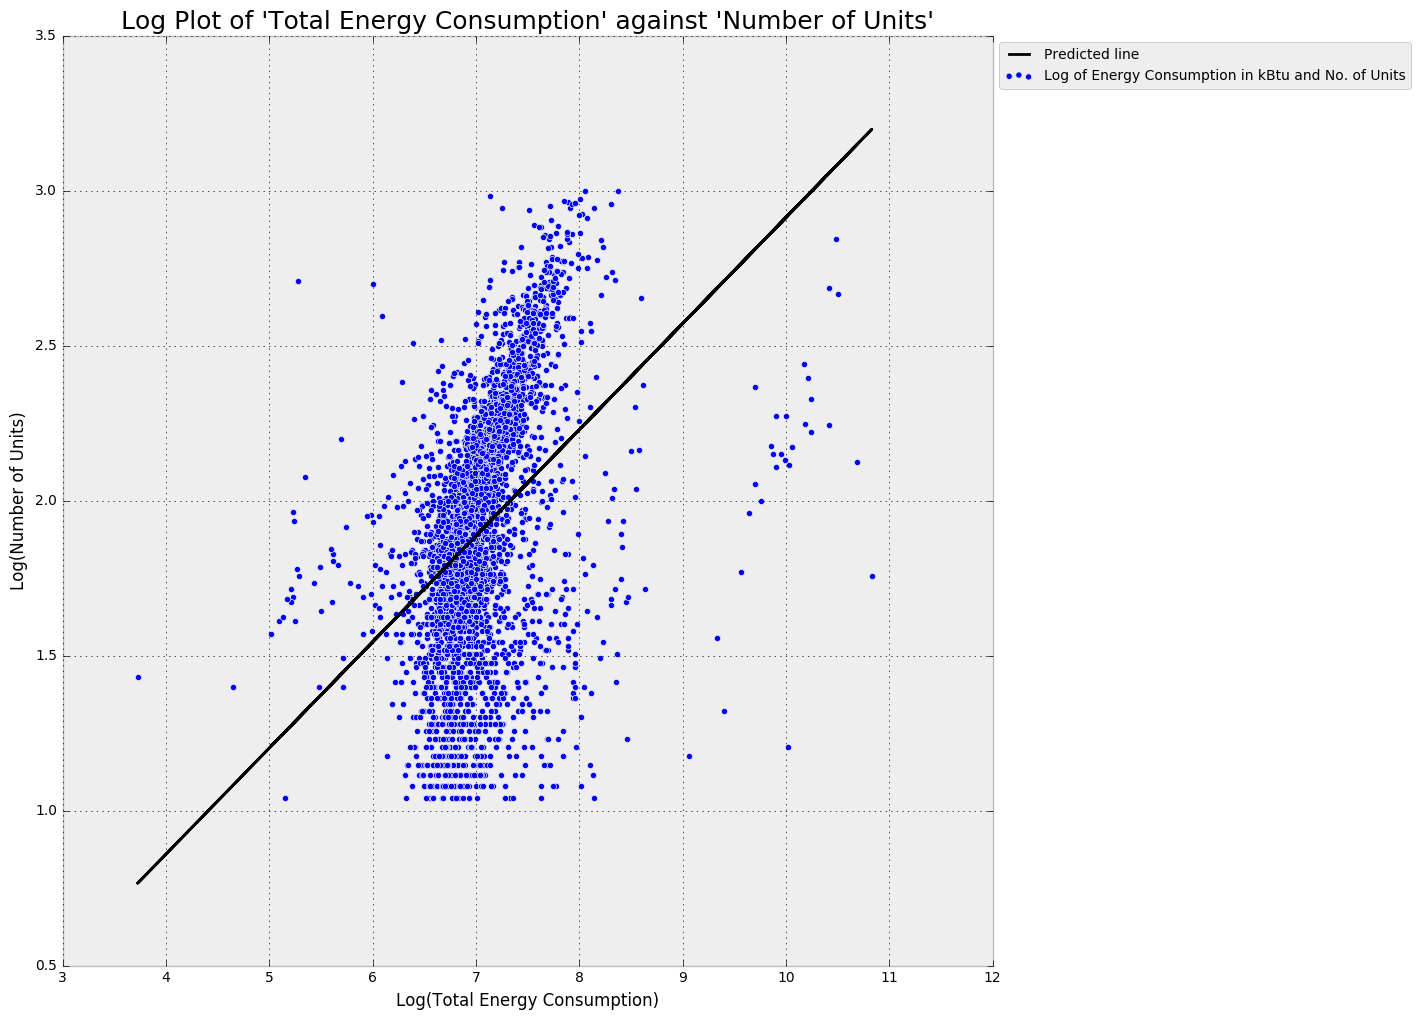

In [321]:
lin_pred_n = linmodel_n.predict(Xn)

data.plot(kind='scatter', 
          y='Units_total', 
          x='Total_energy',
          figsize=(12, 12),
          label = 'Log of Energy Consumption in kBtu and No. of Units')

#pl.ylim(1,3)
pl.title("Log Plot of 'Total Energy Consumption' against 'Number of Units'", fontsize = 18)
pl.xlabel('Log(Total Energy Consumption)')
pl.ylabel('Log(Number of Units)')

pl.plot(data.Total_energy, lin_pred_n, c = 'black', label='Predicted line')

pl.legend(fontsize = 10, loc="upper left", bbox_to_anchor=(1,1))

## choose wisely which is your DEPENDENT and which is your INDEPENDENT variable. 
both for what you want to do logically (what changes as a functino of what) but also based on which variable has a 'sensible' distribution that allows you to fit a function to it: **you need your independent variable to span a large range, and to be spread somewhat evenly in the range, rather than just clustered in a spot** so in this case switching the independent and dependent variable may be a good idea.



1. **Fit a line** to Units vs Energy.
2. **Fit a line** to Energy vs Units.
3. **Evaluate which is better by calculating the chi square**. I provide a function for that or you can write your own. *Assume poisson statistics for the errors on the independent variable*. 
    The function is 
    
    chisq = $\sum_i \frac{(model(x_i) - data(x_i))^2 }{ error_i^2}$
    
    where the sum is over all datapoints, 
    
    for the i-th value with x value $x_i$ model is the predction of your fit for $x_i$, 
    
    $data(x_i)$ 
    is your observation, 
    
    and $error_i$ is $\sqrt{data(x_i)}$
    (but remember you worked in log space! What are the proper errors??)
    
4. **Fit a 2nd degree polynomial** to the Units vs Energy (with statsmodels.formulae.api.ols() for example passing the formula for a parabola, like we did in class. The formula for a 2nd deg polynomial is 
    $y = ax^2+bx+c$ .

5. **Compare the Units vs Energy line fit and the Units vs Energy 2-nd degree polynomial fit with the Likelihood ratio test**. The formula is:
    
    LR  =  -2 * (logLikelihood_Model1 - logLikelihood_Model2)
    
    where Model1 is the least complex (fewer parameters).
    
    Th logLikelihood can be extracted from the model summary when using statsmodels.
    
    Compare this LR statistics to a chi sq table (for example http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG) and say if *at alpha = 0.05* Model1 is preferible to Model2. The LR is chi^2 distributed with number of degrees of freedom N_{DOF} = parameters_Model2 - parameters_Model1
    
    
    Also if you used statsmodels for the fit you can use the 
    compare_lr_test() method of your fit and verify you got the right answer.  Use the method compare_lr_test() of the most complex model of the 2 and pass it the result of stats models for the simpler fit 
    (e.g. smf.ols(formula = ...).fit().compare_lr_test(sm.OLS(...).fit()))



In [322]:
chi_sq1 = sum((lin_pred - data.Total_energy)**2/np.sqrt(data.Total_energy)**2)
chi_sq2 = sum((lin_pred_n - data.Units_total)**2/np.sqrt(data.Units_total)**2)
print 'Chi Square for Model 1(Units(x) vs Energy(y)):', chi_sq1
print 'Chi Square for Model 2(Energy(x) vs Units(y)):', chi_sq2
if chi_sq1 < chi_sq2:
    print '\nModel 1 is better fit than Model 2'
else:
    print '\nModel 2 is better fit than Model 1'

Chi Square for Model 1(Units(x) vs Energy(y)): 97.6143734325
Chi Square for Model 2(Energy(x) vs Units(y)): 304.335075385

Model 1 is better fit than Model 2


In [329]:
data.head(5)

,Total_energy,Units_total,Units_total2,Total_energy2
0,7.616811,1.748188,3.056161,58.015817
1,7.629287,1.380211,1.904983,58.206024
2,7.286094,1.380211,1.904983,53.087170
3,6.950549,1.792392,3.212668,48.310134
4,6.811909,1.929419,3.722657,46.402104


In [330]:
lin_model2 = smf.ols(formula='Total_energy ~ Units_total + Units_total2', data=data).fit()
lin_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Total_energy   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     605.7
Date:                Sun, 16 Oct 2016   Prob (F-statistic):          3.14e-230
Time:                        23:30:01   Log-Likelihood:                -2143.6
No. Observations:                3964   AIC:                             4293.
Df Residuals:                    3961   BIC:                             4312.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        8.1127      0.121     67.265      0.000         7.876     8.349
Units_total     -1.7128      0.127    -13.452      0.000        -1.962    -1.463
Units_total2     0.5791      0.033     17.607      0.000         0.515     0.644
==============================================================================
Omnibus:                     2358.194   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            66309.779
Skew:                           2.328   Prob(JB):                         0.00
Kurtosis:                      22.489   Cond. No.                         123.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

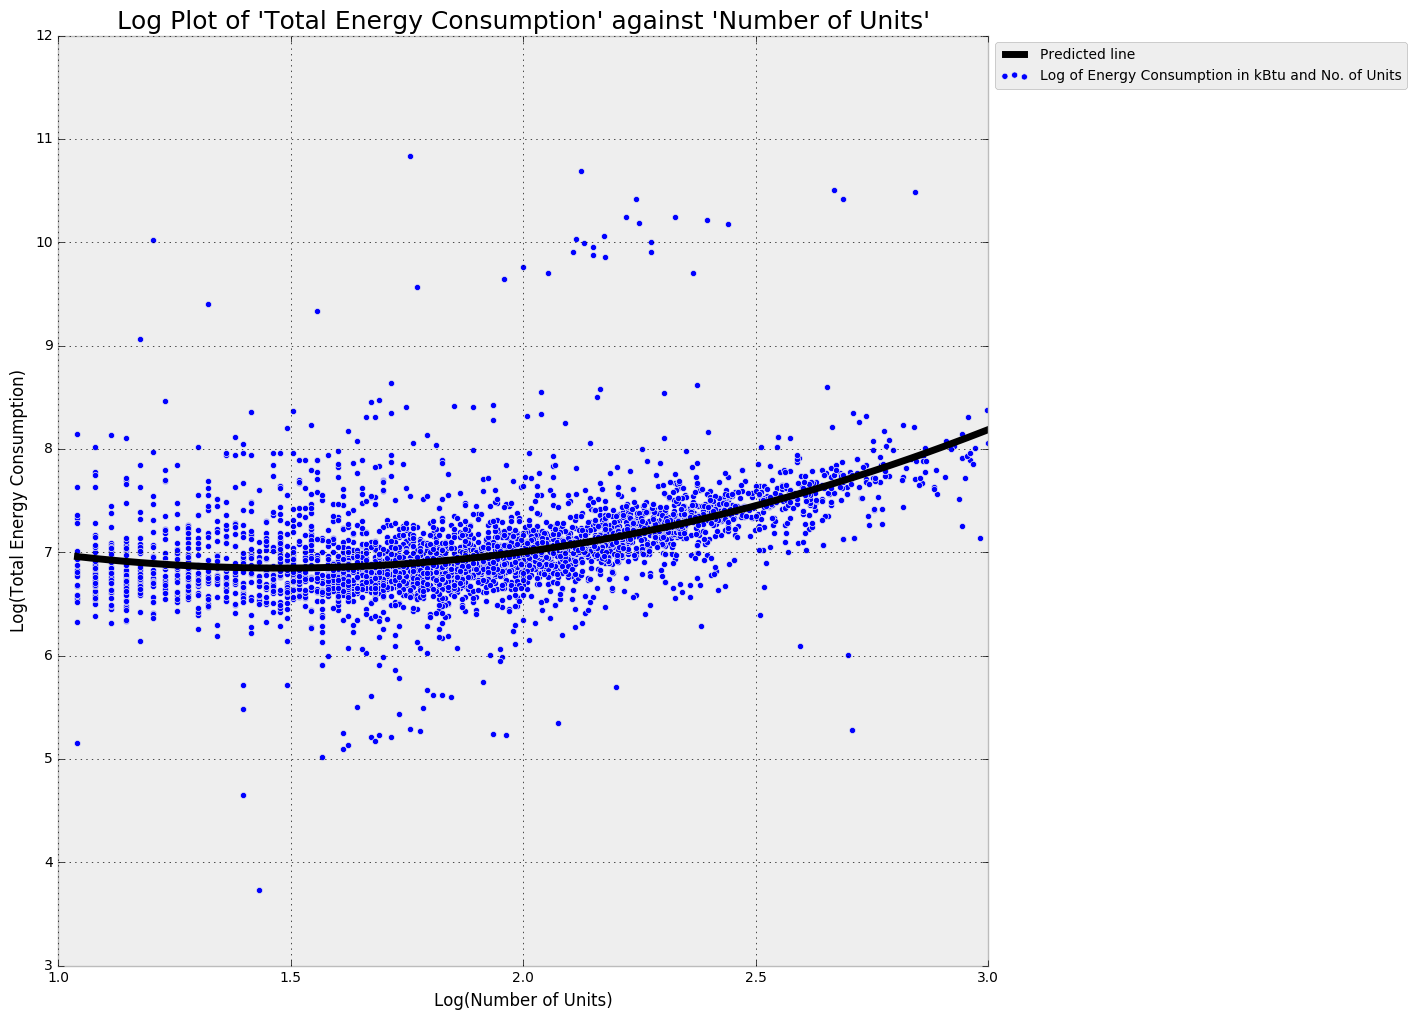

In [331]:
#data.sort_values('Units_total', inplace=True)
lin_pred2 = lin_model2.predict(data.sort_values('Units_total'))
data.plot(kind='scatter', 
          x='Units_total', 
          y='Total_energy',
          figsize=(12, 12),
          label = 'Log of Energy Consumption in kBtu and No. of Units')

pl.xlim(1,3)
pl.title("Log Plot of 'Total Energy Consumption' against 'Number of Units'", fontsize = 18)
pl.ylabel('Log(Total Energy Consumption)')
pl.xlabel('Log(Number of Units)')

pl.plot((sort(data.Units_total)), lin_pred2, c = 'black', lw = 5, label='Predicted line')

pl.legend(fontsize = 10, loc="upper left", bbox_to_anchor=(1,1))

In [332]:
lin_model2_n = smf.ols(formula='Units_total ~ Total_energy + Total_energy2', data=data).fit()
lin_model2_n.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Units_total   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     475.8
Date:                Sun, 16 Oct 2016   Prob (F-statistic):          6.45e-186
Time:                        23:31:13   Log-Likelihood:                -1459.1
No. Observations:                3964   AIC:                             2924.
Df Residuals:                    3961   BIC:                             2943.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        -4.4159      0.408    -10.824      0.000        -5.216    -3.616
Total_energy      1.3970      0.109     12.872      0.000         1.184     1.610
Total_energy2    -0.0707      0.007     -9.774      0.000        -0.085    -0.057
==============================================================================
Omnibus:                       99.101   Durbin-Watson:                   1.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.345
Skew:                          -0.360   Prob(JB):                     1.09e-24
Kurtosis:                       3.385   Cond. No.                     3.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

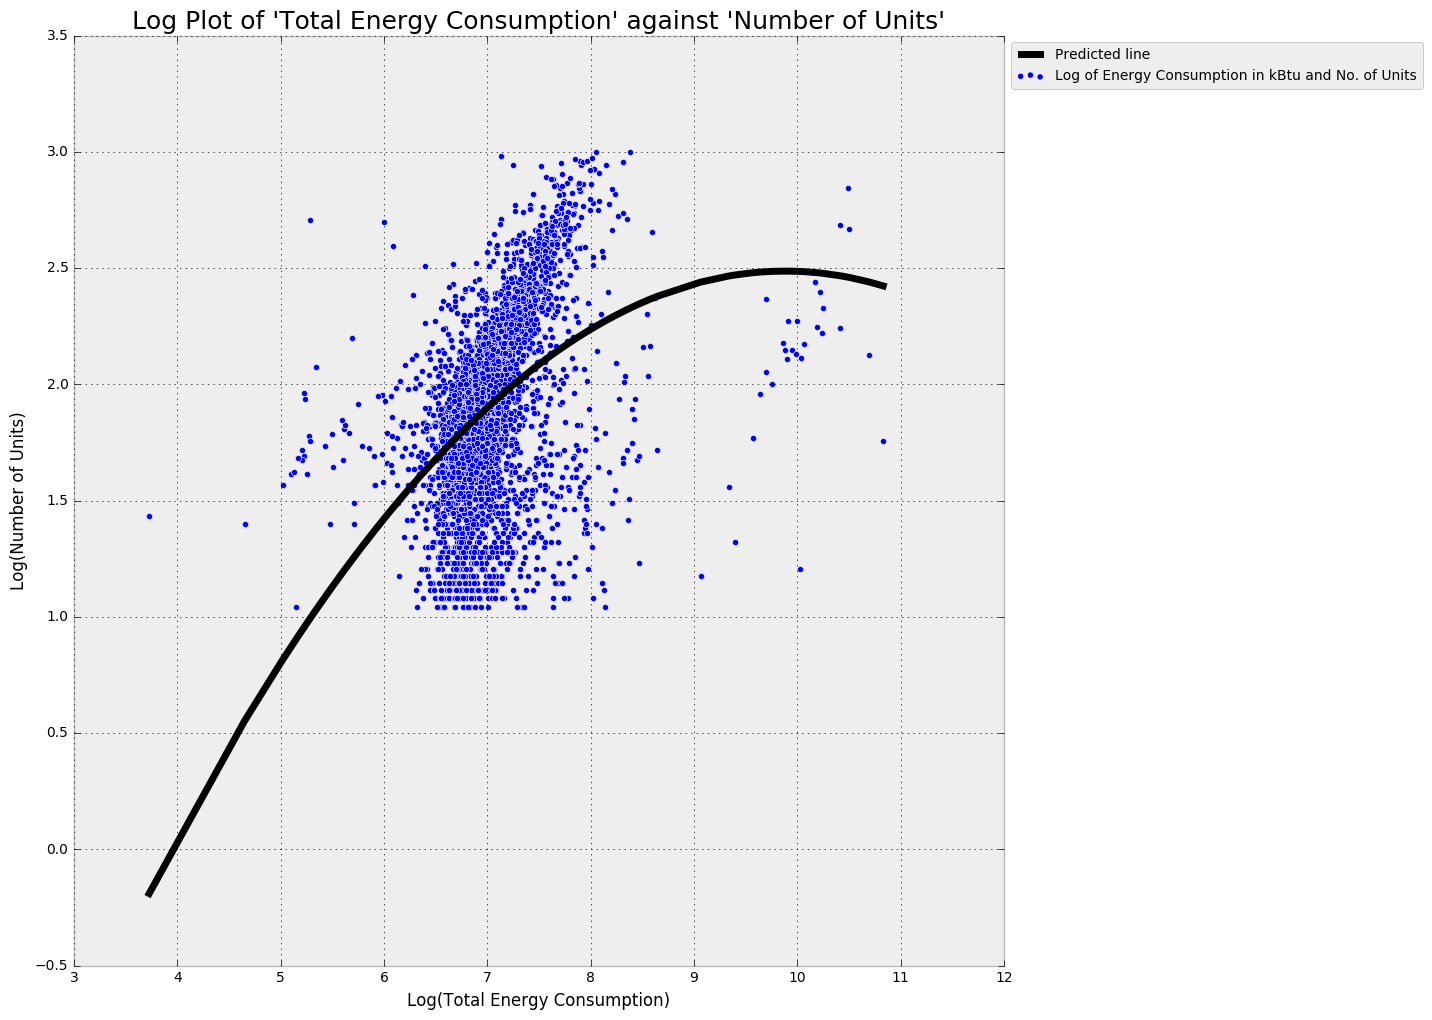

In [333]:
#data.sort_values('Total_energy', inplace=True)
lin_pred2_n = lin_model2_n.predict(data.sort_values('Total_energy'))
data.plot(kind='scatter', 
          y='Units_total', 
          x='Total_energy',
          figsize=(12, 12),
          label = 'Log of Energy Consumption in kBtu and No. of Units')

#pl.ylim(1,3)
pl.title("Log Plot of 'Total Energy Consumption' against 'Number of Units'", fontsize = 18)
pl.xlabel('Log(Total Energy Consumption)')
pl.ylabel('Log(Number of Units)')

pl.plot(sort(data.Total_energy), lin_pred2_n, c = 'black', lw = 5, label='Predicted line')

pl.legend(fontsize = 10, loc="upper left", bbox_to_anchor=(1,1))

In [338]:
x = data.Units_total
y = data.Total_energy
X = sm.add_constant(x)

params = smf.ols(formula='Total_energy ~ Units_total + Units_total2', 
                 data=data).fit().compare_lr_test(sm.OLS(y, X).fit())
print params

(298.69670099573068, 6.3345877129946395e-67, 1.0)


In [308]:
print ("LR : ", -2 * (-linmodel.llf - (-lin_model2.llf)))
print ("LR from statsmodels:", lin_model2.compare_lr_test(linmodel))

('LR : ', -298.69670099573068)
('LR from statsmodels:', (298.69670099573068, 6.3345877129946395e-67, 1.0))


# The LR static when compared to chi square table,
at alpha = 0.05 Model1 is preferible to Model2

## Extra credit 1: calculate and plot the likelihood surface
Create a function that minimizes the residuals:

the residuals are the sum of the differences between data and model: in the case of a line fit model. Use the same function you created for the chi^2 test.

You should sum over each datapoints the residuals squared, which should look something like

(np.log(bblnrgdatacut.nrg) - np.log(bblnrgdatacut.UnitsTotal)*a+b )^2 / errors^2

where a and b are the parameters returned by the line fitter. 

For each data point you can calculate the model at different values : for example in a range B = np.arange (-100, 100, 1) for the intercept, and A = np.arange(-50.0, 50.0, 0.5) for the slope.


You can write it as a nested for loop (or challenge yourself and vectorize it!) with a loop inside another ranging all poissible combinations of the 2 variables (i use enumerate to get both an index from 0 to the size of my array, which i assign to i (and j) and the value of the array at that index - look up the syntax!):


Lsurface = np.zeros((len(A), len(B)))
for i,a in enumerate(A):
    for j,b in enumerate(B):
         Lsurface[i][j] = np.nansum(residuals(a,b,data,errors)) .....

this gives you a 2D array that represents your likelihood surface! What we do to find a good fit is find the minimum (lowest point) on this surface.
You can plot a surface (a 2D array) with pl.imshow(Lsurface) as a "heatmap" but when you do that you will find that the plot is very uninformative. just like you did before with the data, plot the log of it (pl.imshow(np.log(Lsurface)). Also make sure your x and y axes tick numbers represent the range of values, not the cell index, which is the default for imshow. Inputting your data in the cell below should give a plot similar to mine

In [ ]:
pl.figure(figsize=(10,10))
pl.title ("log likelihood surface", fontsize = 22)
pl.imshow(np.log(Lsurface), extent = [-50,50,100,-100], aspect=0.5)
pl.xlabel('slope', fontsize = 22)
pl.ylabel('intercept', fontsize = 22)
pl.colorbar()

## EXTRA CREDIT: get creative with the dataset. can you make an insigntful plot to show any structure in the data?

below I am mapping the building age to a colormap and the ratio of total to residential units to the size of the datapoint.

In [ ]:
bblnrgdata['YearBuilt'][bblnrgdata['YearBuilt']<1800]=1800

bblnrgdata.plot(kind='scatter',x='nrg',y='UnitsTotal', 
                fontsize=22, colormap='gist_rainbow', alpha = 1, 
                marker='o',  figsize=(16, 14), loglog=True,  
                xlim=(1000,1e11), ylim=(1,1000), 
                c=bblnrgdata['YearBuilt']-1900, 
                s=bblnrgdata['UnitsTotal']/bblnrgdata['UnitsRes']*100)
pl.title('Color maps Age in years, Size maps tital/residential units', fontsize=18)
pl.ylabel("total number of units", fontsize=22)
pl.xlabel("total energy consumption (kBtu)", fontsize=22)